(Квази) линейные методы классификации.

Задание.

1. Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas.
Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby).
Визуализировать распределения классов на всех парах переменных.

2. Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро). Пример подходящей визуализации есть в sklearn.

В следующих заданиях можно оставить только два (наименее разделимых) класса.

3. Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) на обучающей выборке и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

4. На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target_names[iris.target]

# Compute correlations
corr_total = df[iris.feature_names].corr()
print("Overall Correlations:\n", corr_total)

# Compute correlations per class
corr_by_class = df.groupby('class').corr()
print("\nCorrelations by Class:\n", corr_by_class)

Overall Correlations:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  

Correlations by Class:
                               sepal length (cm)  sepal width (cm)  \
class                                                               
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)    

2. Visualize Distributions (Pair Plot)

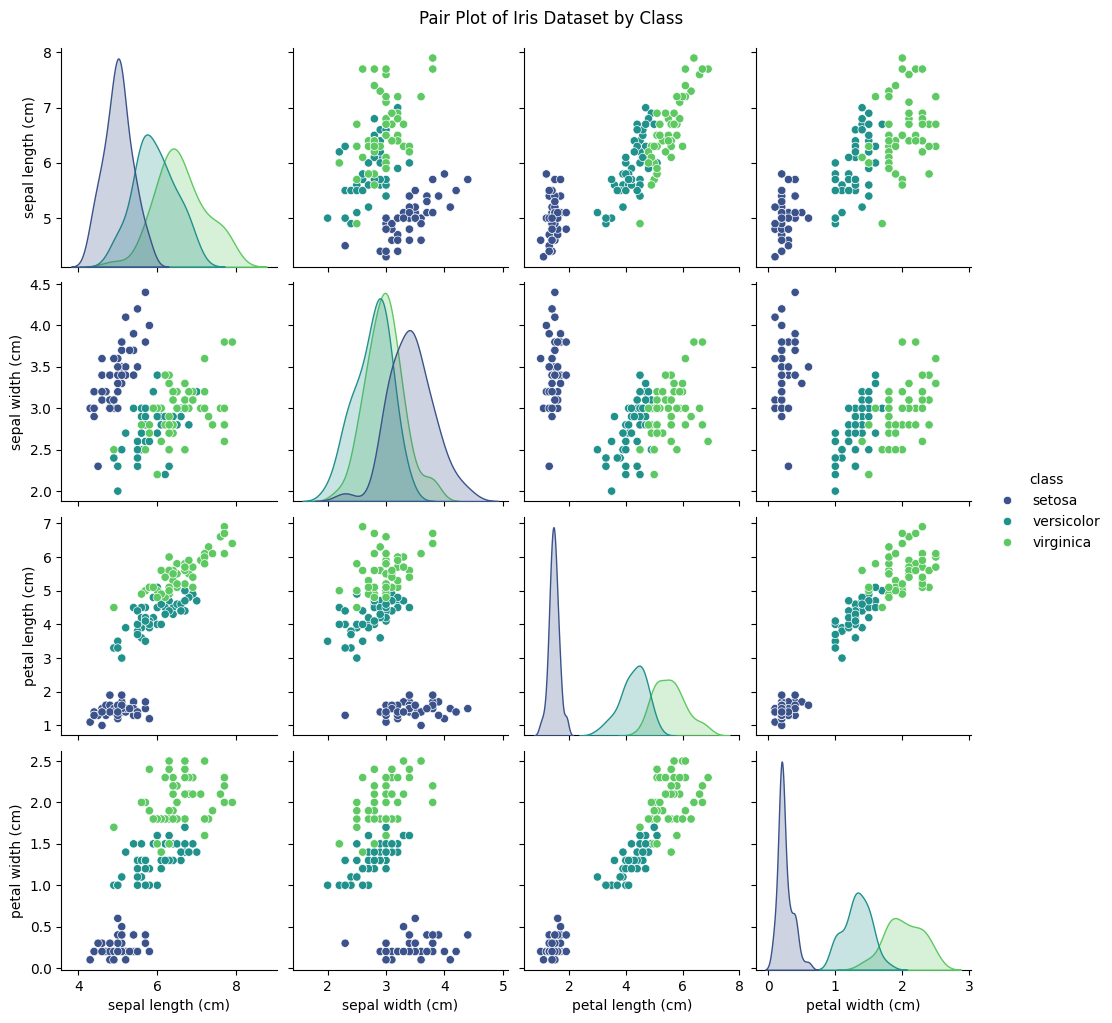

In [ ]:
# creating a pair plot using Seaborn (sns)
sns.pairplot(df, hue='class', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset by Class', y=1.02)
plt.show()

3. Train Models on Two Variables
Select Features and Split Data

In [ ]:
# Choose two features (e.g., petal length and width)
X = df[['petal length (cm)', 'petal width (cm)']]   #feachers (input)
y = df['class']   # target variable

# Split data (use 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Models and Plot Decision Boundaries

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


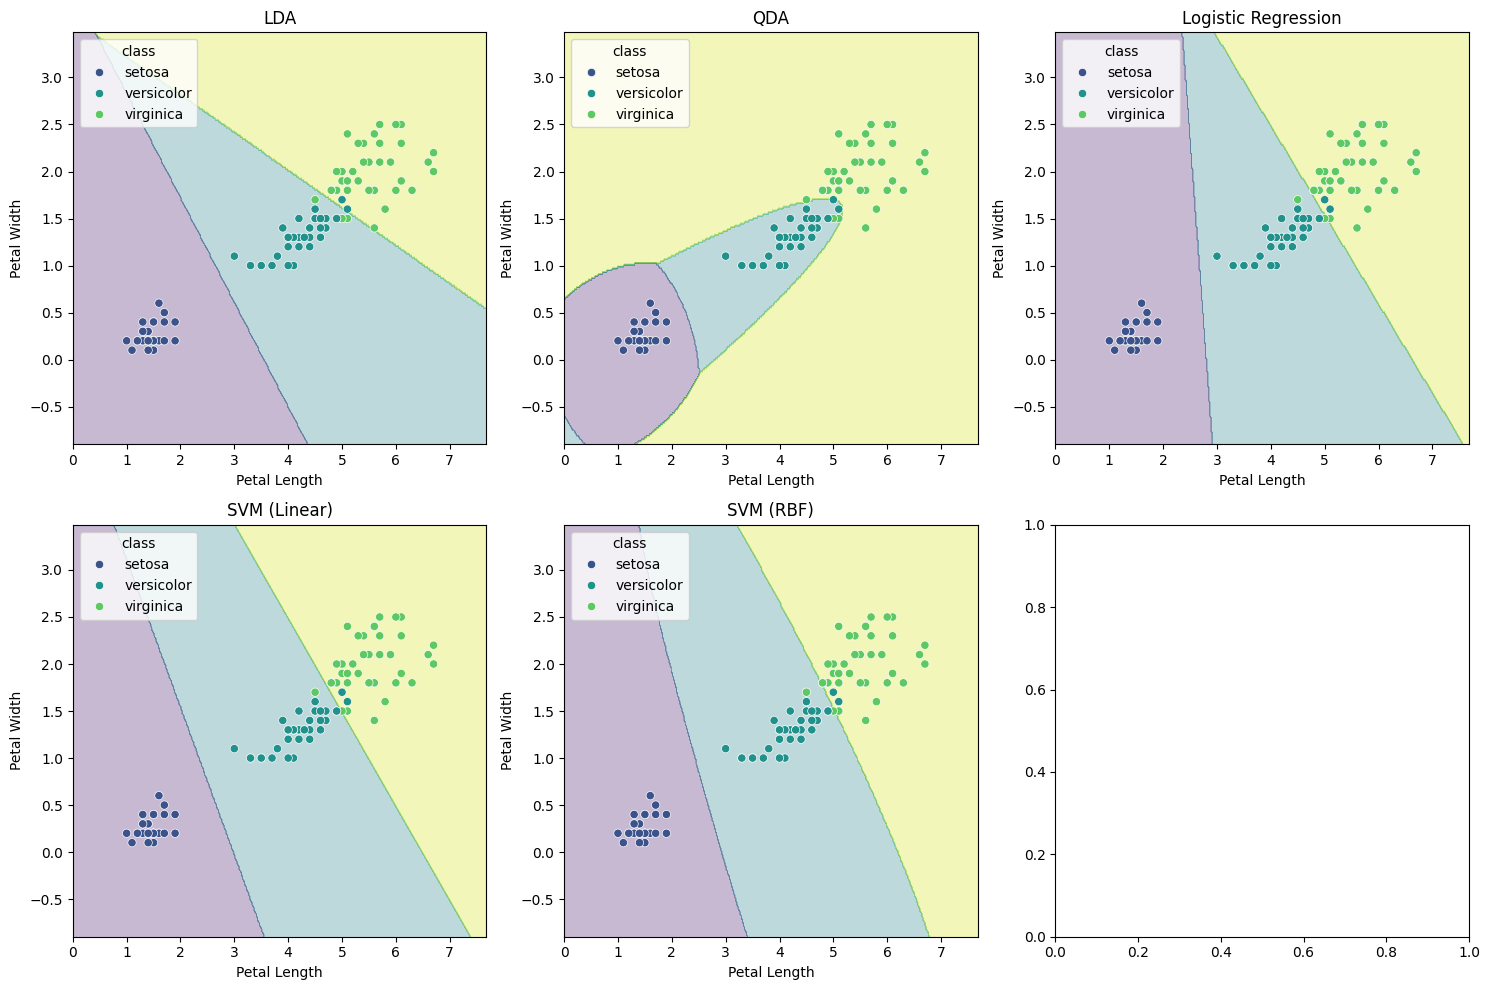

In [ ]:
def plot_decision_boundary(clf, X, y, title, ax):
    # Create mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])       # ravel() => flattens the grid to a list of points.  np.c_[] => stacks the x and y coordinates together for prediction.
    Z = np.array([0 if z == 'setosa' else 1 if z == 'versicolor' else 2 for z in Z]).reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='viridis', ax=ax)
    ax.set_title(title)

# Initialize models
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf')
}

# Plot decision boundaries
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_train, y_train, name, ax)
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')

plt.tight_layout()
plt.show()

4. Focus on Two Least Separable Classes

In [ ]:
# Subset to versicolor and virginica
mask = df['class'].isin(['versicolor', 'virginica'])
X_sub = df.loc[mask, ['petal length (cm)', 'petal width (cm)']]
y_sub = df.loc[mask, 'class']

# Split subset data
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

5. LDA on All Variables and Visualize in 2D Subspaces

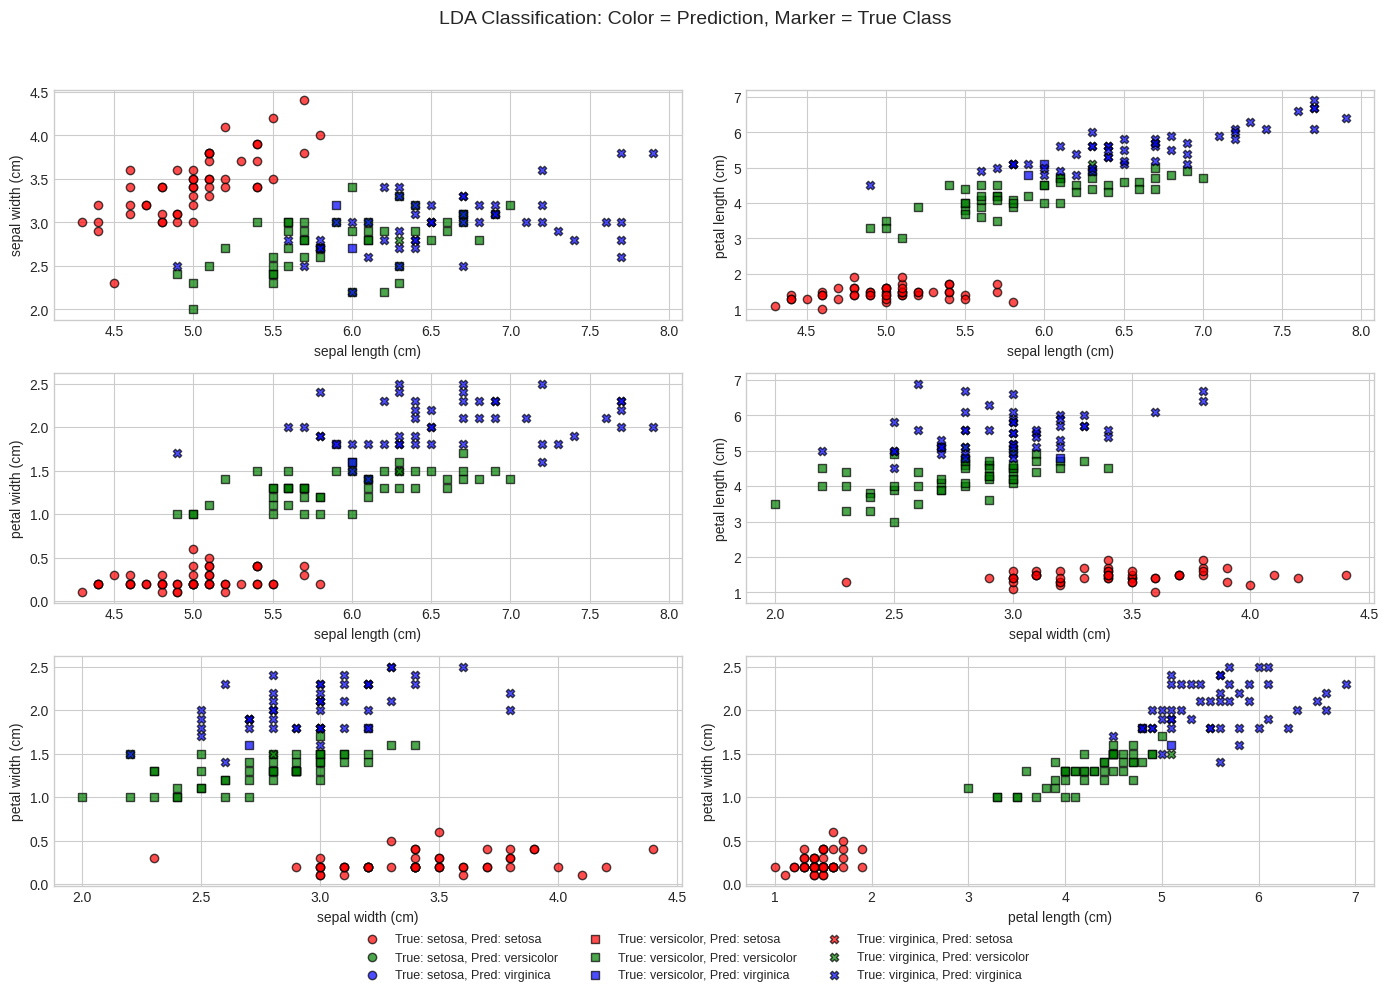

In [ ]:
# Train LDA on all features

# Encode class labels
df['label'] = LabelEncoder().fit_transform(df['class'])
X_all = df[iris.feature_names]
y_all = df['label']

# Fit LDA on all features
lda = LinearDiscriminantAnalysis()
df['pred'] = lda.fit(X_all, y_all).predict(X_all)

# Setup
features = iris.feature_names
colors = ['red', 'green', 'blue']     # predicted classes
markers = ['o', 's', 'X']             # actual classes

# Plot all 2D combinations
plt.figure(figsize=(14, 10))
plot_num = 1
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.subplot(3, 2, plot_num)
        for true_class in range(3):
            for pred_class in range(3):
                subset = df[(df['label'] == true_class) & (df['pred'] == pred_class)]
                plt.scatter(                                                         # The points are displayed on the plot using the scatter function. The true class is indicated by the marker, and the predicted class is indicated by the color.
                    subset[features[i]],
                    subset[features[j]],
                    c=colors[pred_class],
                    marker=markers[true_class],
                    label=f'True: {iris.target_names[true_class]}, Pred: {iris.target_names[pred_class]}',
                    edgecolor='black',
                    alpha=0.7
                )
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plot_num += 1

plt.suptitle("LDA Classification: Color = Prediction, Marker = True Class", fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.figlegend(by_label.values(), by_label.keys(), loc='lower center', ncol=3, fontsize=9)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

6. Manual QDA Implementation

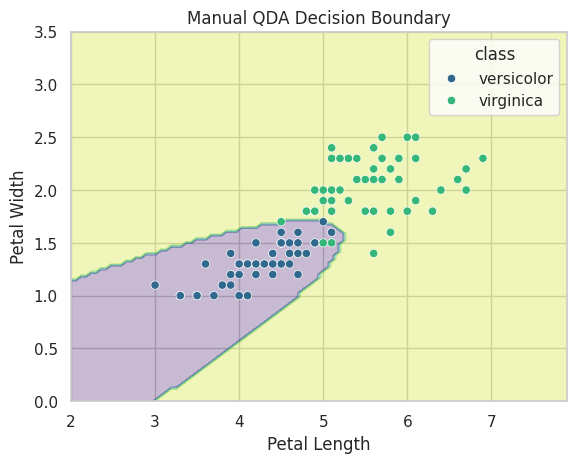

In [ ]:
# Subset data to two classes
class0 = 'versicolor'
class1 = 'virginica'
X_manual = X_sub.values
y_manual = np.where(y_sub == class0, 0, 1)

# Compute mean and covariance for each class
mu0 = X_manual[y_manual == 0].mean(axis=0)
mu1 = X_manual[y_manual == 1].mean(axis=0)
cov0 = np.cov(X_manual[y_manual == 0].T)
cov1 = np.cov(X_manual[y_manual == 1].T)

# Define quadratic discriminant function
def manual_qda_predict(x, mu0, mu1, cov0, cov1):
    inv_cov0 = np.linalg.inv(cov0)
    inv_cov1 = np.linalg.inv(cov1)
    det_cov0 = np.linalg.det(cov0)
    det_cov1 = np.linalg.det(cov1)

    # Compute discriminant scores
    score0 = -0.5 * np.log(det_cov0) - 0.5 * (x - mu0).T @ inv_cov0 @ (x - mu0)
    score1 = -0.5 * np.log(det_cov1) - 0.5 * (x - mu1).T @ inv_cov1 @ (x - mu1)
    return 0 if score0 > score1 else 1

# Generate grid
x_min, x_max = X_sub.iloc[:, 0].min() - 1, X_sub.iloc[:, 0].max() + 1
y_min, y_max = X_sub.iloc[:, 1].min() - 1, X_sub.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict for each grid point
Z_manual = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        Z_manual[i, j] = manual_qda_predict([xx[i, j], yy[i, j]], mu0, mu1, cov0, cov1)

# Plot manual QDA
plt.contourf(xx, yy, Z_manual, alpha=0.3, cmap='viridis')
sns.scatterplot(x=X_sub.iloc[:, 0], y=X_sub.iloc[:, 1], hue=y_sub, palette='viridis')
plt.title('Manual QDA Decision Boundary')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()